In [3]:

import sys,os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import imageio
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os
import torch.nn.functional as F
sys.path.append('../')
from utils.io import prepare_input_image
from glob import glob

In [4]:
from model.main import DepthNetModule

In [5]:
# Load the model checkpoint
model_path = '/home/ashkanganj/workspace/2023-HybridDepth-DepthProject/checkpoints/NyuBest5.ckpt'
model = DepthNetModule.load_from_checkpoint(model_path)
model.eval()
model = model.to('cuda')

Using cache found in /home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main
/home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/ashkanganj/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/

run with random init
DFV model size (GB): 0.07264868915081024
Loading weights:  None


Using cache found in /home/ashkanganj/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


In [6]:
def save_vis(pred_dpth, pred_dfv, gs_depth, im, dir_name='default'):
    # pred viz
    outdir = '/home/ashkanganj/workspace/2023-HybridDepth-DepthProject/results/imgs'
    img_save_pth = os.path.join(os.path.abspath(outdir), 'mobile_depth')
    
    # Create directory if it doesn't exist
    if not os.path.isdir(img_save_pth):
        os.makedirs(img_save_pth)
    
    # Set the display range for depth images
    MAX_DISP, MIN_DISP = pred_dpth.max(), pred_dpth.min()

    # Resize the RGB image to match the shape of the depth images
    im_resized = plt.imshow(im).get_array().data  # Fetching the image data
    im_resized = im_resized[:pred_dpth.shape[0], :pred_dpth.shape[1], :]  # Resizing
    
    # Create a side-by-side plot of pred_dpth, pred_dfv, and depth anything
    fig, axs = plt.subplots(1, 4, figsize=(10, 3))  # Reduce figsize to make images smaller
    
    # Adjust the space between the images
    plt.subplots_adjust(wspace=0.04)  # Further reducing the distance between subplots

    # Set font to Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 11

    # Plot the RGB image
    axs[0].imshow(im_resized)
    axs[0].axis('off')
    # axs[0].set_title('RGB Image', ha='center', va='center')  # Horizontal and vertical alignment

    # Plot pred_dpth
    im1 = axs[1].imshow(pred_dpth, cmap='plasma', vmin=MIN_DISP, vmax=MAX_DISP)
    axs[1].axis('off')
    # axs[1].set_title('Ours', ha='center', va='center')  # Align text

    # Plot pred_dfv
    im2 = axs[2].imshow(pred_dfv, cmap='plasma', vmin=MIN_DISP, vmax=MAX_DISP)
    axs[2].axis('off')
    # axs[2].set_title('DFV', ha='center', va='center')  # Align text

    # Plot depth from another source (gs_depth)
    im3 = axs[3].imshow(gs_depth, cmap='plasma', vmin=MIN_DISP, vmax=MAX_DISP)
    axs[3].axis('off')
    # axs[3].set_title('Depth Anything', ha='center', va='center')  # Align text

    # Save the figure
    plt.savefig(os.path.join(img_save_pth, f'{dir_name}_pred_viz_diff.png'), bbox_inches='tight', pad_inches=0)
    plt.close()


torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 352]) torch.Size([1, 3, 224, 352])


/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


time = 251.77
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 88.75
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 16.88
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 16.95
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 16.83
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 16.90
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 16.91
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 16.91
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 352]) torch.Size([1, 3, 224, 352])
time = 16.38
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 416]) torch.Size([1, 3, 224, 416])
time = 17.00
torch.Size([1, 10]) torch.Size([1, 10, 3, 224, 352]) torch.Size([1, 3, 224, 352])
time = 16.21


NameError: name 'save_multi_image_vis' is not defined

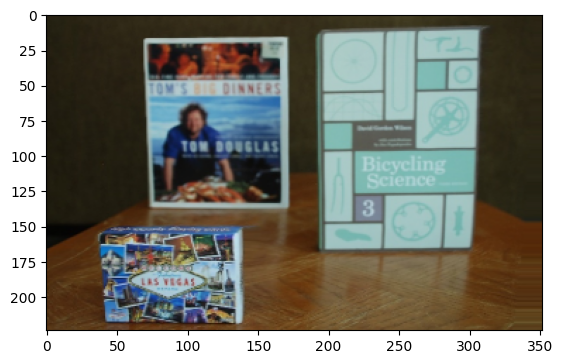

In [7]:
import time
counter = 0

data_depthAnything = []
data_DFV = []
data_hybridDepth = []
data_rgb = []

data_path = '/home/ashkanganj/workspace/dataset/mobileDepth/data'
stack_num = 10
base_width = 32

device = 'cuda' 

for dir in os.listdir(data_path):

    # img load
    img_lst = glob(data_path + '/' + dir + '/a*.jpg')
    img_lst.sort(key=lambda x: int(os.path.basename(x)[1:-4]))

    mats_input = []
    img_mean = np.array([0.485, 0.456, 0.406]).reshape([1,1,3])
    img_std = np.array([[0.229, 0.224, 0.225]]).reshape([1,1,3])
    for pth in img_lst:
        im = cv2.imread(pth) / 255.0
        img = im
        h, w, _  = im.shape
        zoomx, zoomy = 224/ h, 224/ w
        zoom = max(zoomx, zoomy)
        rsz_img = cv2.resize(im, dsize=None, fx=zoom, fy=zoom)

        max_h = int(rsz_img.shape[0] // base_width * base_width)
        max_w = int(rsz_img.shape[1] // base_width * base_width)
        if max_h < rsz_img.shape[0]: max_h += base_width
        if max_w < rsz_img.shape[1]: max_w += base_width

        top_pad = max_h - rsz_img.shape[0]
        left_pad = max_w - rsz_img.shape[1]
        mat_all = np.lib.pad(rsz_img, ( (top_pad, 0), (0, left_pad), (0, 0)), mode='constant', constant_values=0)

        mat_all = (mat_all - img_mean) / img_std

        mats_input.append(mat_all)

    mats_input = np.stack(mats_input)
    img_num, h, w, _ = mats_input.shape

    # focus load
    focus_dist_np = np.genfromtxt(data_path+ '/' + dir + '/focus_dpth.txt')

    if dir == 'metals':  # metals' distance esitimation is oppsoite, as we only care about relative dist, directly take minus
        focus_dist_np = - focus_dist_np

    # sort image and dist
    img_dist = [(i, focus_dist_np[x]) for i, x in enumerate(range(img_num))]
    # already sorted in the s
    sort_img_dist = sorted(img_dist, key=lambda x: x[1])
    img_stack = torch.from_numpy( np.stack([mats_input[x[0]] for x in sort_img_dist])).float().permute([0, 3, 1, 2]).to(device)

    # Some focal distance estimation has extremely large scale difference, up to ~10^6, and
    # In the window scene, we observe a fairly large focal distance range from frames, but the estimated focal distance does not change much.
    # For these scenes,  we found use a linear distance distrbution w.r.t. the relative order leads to better visual results.
    # All baselines method presented in the paper use the same in this dataset, except mobileDFF and AiFDepthNet
    # MobileDFF use the author provided results, AiFDepthNet we use their code without any modification
    if sort_img_dist[0][1] * 10 < sort_img_dist[-1][1] or dir == 'window':
        focus_dist = torch.linspace(0, 1., img_num)
    else:
        focus_dist = torch.from_numpy( np.stack([x[1] - sort_img_dist[0][1] for x in sort_img_dist])).float() # torch.linspace(0, 1., img_num) #
        focus_dist = focus_dist / (sort_img_dist[-1][1] - sort_img_dist[0][1])

    # select image evenly
    if img_num > stack_num:
        idx = np.linspace(0, img_num-1, stack_num).round().astype(int)
        focus_dist = focus_dist[idx]
        img_stack = img_stack[idx]
    
    img_stack = img_stack.unsqueeze(0)
    focus_dist = focus_dist.unsqueeze(0)
    # select one image from stack [1, 10, 3, 224, 352])
    rgb_img = img_stack[0, 0].unsqueeze(0)
    
    rgb_img = rgb_img.to(device)
    img_stack = img_stack.to(device)
    focus_dist = focus_dist.to(device)
    

    print(focus_dist.shape, img_stack.shape, rgb_img.shape)

    with torch.no_grad():
        torch.cuda.synchronize()
        start_time = time.time()
        # pred_dpth, std, focusMap = model(img_stack, focus_dist)
        out = model(rgb_img, img_stack, focus_dist)
        pred_dpth = out[0]
        pred_dfv = out[4]
        depth_anything = out[2]
        torch.cuda.synchronize()
        ttime = (time.time() - start_time); print('time = %.2f' % (ttime*1000) )
    
    pred_dpth = pred_dpth.squeeze().cpu().numpy()[top_pad:, :-left_pad]
    pred_dfv = pred_dfv.squeeze().cpu().numpy()[top_pad:, :-left_pad]
    depth_anything = depth_anything.squeeze().cpu().numpy()[top_pad:, :-left_pad]
    
    
    # reverse normalization for visualization
    rgb = (rgb_img.squeeze().cpu().numpy().transpose([1, 2, 0]) * img_std + img_mean) * 255
    rgb = rgb[top_pad:, :-left_pad]
    rgb = cv2.cvtColor(rgb.astype(np.uint8), cv2.COLOR_RGB2BGR)
    im = cv2.resize(rgb, (w, h))
    
    
    data_DFV.append(pred_dfv)
    data_depthAnything.append(depth_anything)
    data_hybridDepth.append(pred_dpth)
    data_rgb.append(im)
    counter += 1
    
    save_vis(pred_dpth, pred_dfv,depth_anything, im, dir_name=str(counter))
    